# Run the whole deltas algorithm

In [17]:
%load_ext autoreload
%autoreload 2

import deltas
from deltas.pipeline import data, classifier, evaluation
from deltas.model import downsample

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Get data

In [18]:
datasets = {0: 'Breast Cancer', 2: 'Iris', 3: 'Wine', 4: 'Pima Indian Diabetes',
            5: 'Sonar Rocks vs Mines', 6: 'Banknote Authentication',
            7: 'Abalone Gender', 8: 'Ionosphere', 9: 'Wheat Seeds',
            10: 'Credit Scoring 1', 11: 'Credit Scoring 2',
            12: 'Direct Marketing', 13: 'Habermans breast cancer',
            14: 'Wisconsin Breast Cancer', 15: 'Hepatitis',
            16: 'Heart Disease'}

dataset = datasets[16]  # change ind to select dataset to use
data_clf = data.get_real_dataset(dataset, _print=False, seed=0, scale=True)

## Get Classifier

In [19]:
model = 'SVM-linear'
model = 'SVM-rbf'
# model = 'Linear'
# model = 'MLP'
classifiers_dict = classifier.get_classifier(
                      data_clf=data_clf,
                      model=model,
                      balance_clf=False,
    _plot=False)
data_clf['clf'] = classifiers_dict['Baseline']                      

## Fit deltas

Original Data
plotting training data as data input


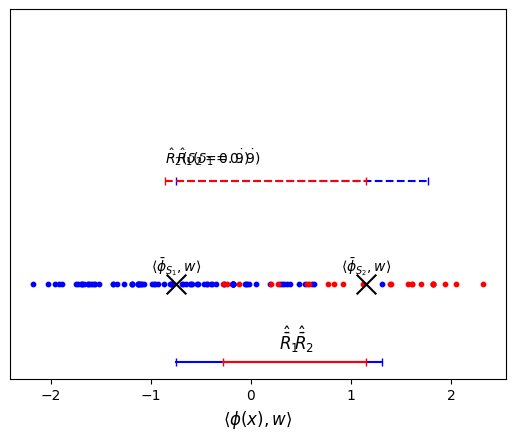

Budget 53 found 10 viable downsampled solutions
Best solution found by removing 52 data points
Downsampled Data:


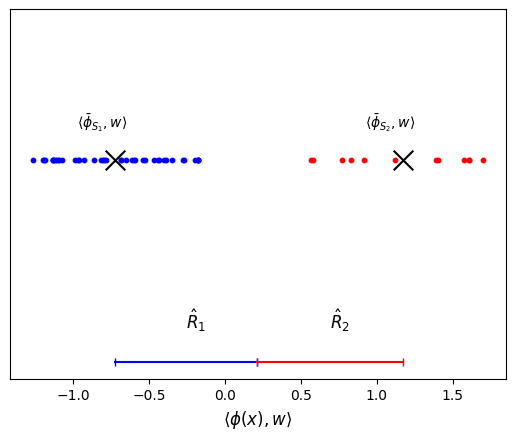

In [20]:
X = data_clf['data']['X']
y = data_clf['data']['y']
clf = data_clf['clf']
# deltas_model = model_deltas.reprojection_deltas(
deltas_model = downsample.downsample_deltas(
    clf,
).fit(X, y, 
      alpha=1, 
      continuous_slacks=False,
      prop_penalty=True,
      _print=True, 
      _plot=True, 
      max_trials=1000, 
      parallel=True)

## Show parameters

In [21]:
deltas_model.print_params()
deltas_model.print_deltas()

Parameters
                R:  1.7032521899093922
                N1: 42
                N2: 12
                R1: 0.5470146320561318
                R2: 0.6080923028063818
                M:  0.7427420699005252
                D:  1.8978490047630387
                C1: 1
                C2: 1
"
                  delta1: 0.031900000000000005 
                  delta2: 0.9999731476958791
                  constraint: 0.0
                  


# Evaluation on test data

In [22]:
classifiers_dict['Our Method'] = deltas_model
evaluation.eval_test(classifiers_dict,
                       data_clf['data_test'], _print=True, _plot=False)

                  Accuracy    G-Mean        F1
Method                                        
Baseline          0.896226  0.780869  0.731707
SMOTE             0.839623  0.604858  0.514286
Balanced Weights  0.830189  0.725550  0.608696
BMR               0.905660  0.826086  0.772727
Threshold         0.905660  0.826086  0.772727
Our Method        0.905660  0.878839  0.800000 




,Accuracy,G-Mean,F1
Method,,,
Baseline,0.896226,0.780869,0.731707
SMOTE,0.839623,0.604858,0.514286
Balanced Weights,0.830189,0.725550,0.608696
BMR,0.905660,0.826086,0.772727
Threshold,0.905660,0.826086,0.772727
Our Method,0.905660,0.878839,0.800000
